In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [41]:
data = pandas.read_csv('data-uber.csv')

In [42]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [5]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# Converted date to python date

In [ ]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [47]:
data.tail()

,Date/Time,Lat,Lon,Base,Day-of-month
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [49]:
data.head()

,Date/Time,Lat,Lon,Base,Day-of-month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


# Added row day of month
    

In [ ]:
def get_day_of_month(d):
    return d.day

data['Day-of-month'] = data['Date/Time'].map(get_day_of_month)

In [51]:
data.head()

,Date/Time,Lat,Lon,Base,Day-of-month,Day-of-week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday


# Added row day of week

In [ ]:
def get_day_of_week(d):
    return d.day_name()

data['Day-of-week'] = data['Date/Time'].map(get_day_of_week)

In [53]:
data.head()

,Date/Time,Lat,Lon,Base,Day-of-month,Day-of-week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday


In [55]:
data[0:2]

,Date/Time,Lat,Lon,Base,Day-of-month,Day-of-week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday


# Added hour uber served

In [56]:
def get_hour(d):
    return d.hour

data['hour'] = data['Date/Time'].map(get_hour)

In [57]:
data.tail()

,Date/Time,Lat,Lon,Base,Day-of-month,Day-of-week,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,Wednesday,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,Wednesday,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,Wednesday,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,Wednesday,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,Wednesday,23


# Analyze 1

Text(0.5, 1.0, 'Frequency by Day of month - Uber data 2014 Apr')

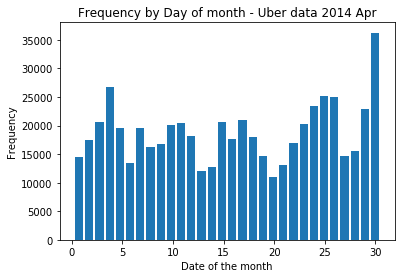

In [84]:
hist(data['Day-of-month'], bins=30, rwidth=.8, range=(0.2, 30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Day of month - Uber data 2014 Apr')

In [61]:

#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_day_of_month = data.groupby('Day-of-month').apply(count_rows)
by_day_of_month

Day-of-month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

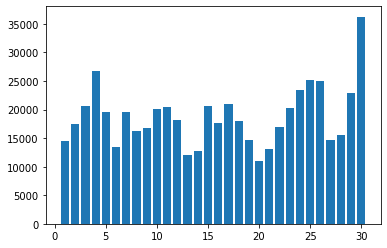

In [64]:
bar(range(1, 31), by_day_of_month)

In [73]:
# Sorting
by_day_of_month_sorted = by_day_of_month.sort_values()
by_day_of_month_sorted

Day-of-month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

In [ ]:
# Sorted bar
by_day_of_month_sorted.plot(kind='barh', figsize=(20,15))
ylabel('Date of the month')
xlabel('Frequency')
title('Frequency by Day of month - Uber data 2014 Apr')

In [ ]:
data['Day-of-month'].plot(kind='scatter', figsize=(20,15))
ylabel('Date of the month')
xlabel('Frequency')
title('Frequency by Day of month - Uber data 2014 Apr')

# Analyze 2